### Recreate Energy Deficit Graphs with new data after scaling

In [1]:
from tensorflow import keras
import pickle
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow import keras
import seaborn as sns
import pickle
import functools
import fastdtw
import scipy.spatial.distance as sd
import functools
import matplotlib.pyplot as plt
import seaborn as sns

2022-04-15 23:04:23.194280: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-15 23:04:23.194306: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Scenario 1
scenario1_cluster0_results_file = open("Models/Scenario1/Objects/RNN/zero_cluster_results.pickle", "rb")
scenario1_cluster0_results = pickle.load(scenario1_cluster0_results_file)
scenario1_cluster0_results_file.close()

scenario1_cluster1_results_file = open("Models/Scenario1/Objects/RNN/one_cluster_results.pickle", "rb")
scenario1_cluster1_results = pickle.load(scenario1_cluster1_results_file)
scenario1_cluster1_results_file.close()

scenario1_cluster2_results_file = open("Models/Scenario1/Objects/RNN/two_cluster_results.pickle", "rb")
scenario1_cluster2_results = pickle.load(scenario1_cluster2_results_file)
scenario1_cluster2_results_file.close()

scenario1_cluster3_results_file = open("Models/Scenario1/Objects/RNN/three_cluster_results.pickle", "rb")
scenario1_cluster3_results = pickle.load(scenario1_cluster3_results_file)
scenario1_cluster3_results_file.close()

# Scenario 3
scenario3_cluster0_results_file = open("Models/Scenario3/Objects/RNN/zero_cluster_results.pickle", "rb")
scenario3_cluster0_results = pickle.load(scenario3_cluster0_results_file)
scenario3_cluster0_results_file.close()

scenario3_cluster1_results_file = open("Models/Scenario3/Objects/RNN/one_cluster_results.pickle", "rb")
scenario3_cluster1_results = pickle.load(scenario3_cluster1_results_file)
scenario3_cluster1_results_file.close()

scenario3_cluster2_results_file = open("Models/Scenario3/Objects/RNN/two_cluster_results.pickle", "rb")
scenario3_cluster2_results = pickle.load(scenario3_cluster2_results_file)
scenario3_cluster2_results_file.close()

scenario3_cluster3_results_file = open("Models/Scenario3/Objects/RNN/three_cluster_results.pickle", "rb")
scenario3_cluster3_results = pickle.load(scenario3_cluster3_results_file)
scenario3_cluster3_results_file.close()

# Scenario 2
all_cluster_results_file = open("Models/Scenario2/Objects/RNN/all_cluster_results.pickle", "rb")
all_cluster_results = pickle.load( all_cluster_results_file)
all_cluster_results_file.close()

# Scenario 4
scenario_4_all_cluster_results_file = open("Models/Scenario4/Objects/RNN/all_cluster_results.pickle", "rb")
scenario_4_all_cluster_results=pickle.load(scenario_4_all_cluster_results_file)
scenario_4_all_cluster_results_file.close()

In [3]:
all_cluster_results.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28])

In [4]:
scenario_4_all_cluster_results.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28])

In [5]:
def create_consolidated(all_cluster_results):
    house_dfs = list()
    for house in all_cluster_results.keys():
        house_df = all_cluster_results[house]
        house_df['House Number'] = house
        house_dfs.append(house_df)
    return pd.concat(house_dfs, axis=0)

In [6]:
scenario_2_consumption_df = create_consolidated(all_cluster_results)
scenario_4_consumption_df = create_consolidated(scenario_4_all_cluster_results)

In [7]:
scenario_4_consumption_df

,energy_kWh,energy_predicted,Energy Consumption Error,Anomaly detected,Wind Energy,Solar Energy,timestamp,Total Generated Energy,Predicted Energy Deficit,Energy Deficit Flag,House Number
0,0.5030,0.841266,0.338266,False,0.274921,0.6870,2012-06-01 15:00:00,0.961921,0.120655,False,1
1,0.5560,0.578761,0.022761,False,0.275400,0.3546,2012-06-01 16:00:00,0.630000,0.051239,False,1
2,0.9250,0.755119,-0.169881,False,0.217765,0.1350,2012-06-01 17:00:00,0.352765,-0.402353,0.402353,1
3,0.7130,1.193627,0.480627,False,0.159931,0.1320,2012-06-01 18:00:00,0.291931,-0.901696,0.901696,1
4,0.5970,0.886199,0.289199,False,0.160491,0.0492,2012-06-01 19:00:00,0.209691,-0.676508,0.676508,1
...,...,...,...,...,...,...,...,...,...,...,...
15737,3.5802,2.164565,-1.415635,False,0.218262,0.0540,2020-05-19 19:00:00,0.272262,-1.892303,1.892303,28
15738,3.4398,2.728073,-0.711727,False,0.358949,0.0012,2020-05-19 20:00:00,0.360149,-2.367924,2.367924,28
15739,2.3049,2.934740,0.629840,False,0.550725,0.0000,2020-05-19 21:00:00,0.550725,-2.384015,2.384015,28
15740,2.4921,2.303710,-0.188390,False,0.801295,0.0000,2020-05-19 22:00:00,0.801295,-1.502416,1.502416,28


In [8]:
print("Energy Deficit with Network Devices in 2017")
scen_2_consum =scenario_2_consumption_df[(scenario_2_consumption_df['timestamp'] == '2017-11-02 00:00:00')][['energy_predicted','Total Generated Energy', 'Predicted Energy Deficit', 'House Number']].reset_index().copy()
scen_2_consum

Energy Deficit with Network Devices in 2017


,index,energy_predicted,Total Generated Energy,Predicted Energy Deficit,House Number
0,12216,0.269586,0.279972,0.010387,2
1,23887,0.506504,0.279972,-0.226532,3
2,24032,0.867306,0.279972,-0.587334,4
3,24019,0.399825,0.279972,-0.119852,5
4,24073,0.600857,0.279972,-0.320885,6
5,21210,0.832352,0.279972,-0.552380,7
6,23425,0.649550,0.279972,-0.369577,8
7,21867,0.523920,0.279972,-0.243947,9
8,23503,0.363255,0.279972,-0.083283,10
9,23360,0.802199,0.279972,-0.522226,11


In [9]:
print("Energy Deficit without Network Devices in 2017")
scen_4_consum = scenario_4_consumption_df[(scenario_4_consumption_df['timestamp'] == '2017-11-02 00:00:00')][['energy_predicted','Total Generated Energy', 'Predicted Energy Deficit', 'House Number']].reset_index().copy()
scen_4_consum

Energy Deficit without Network Devices in 2017


,index,energy_predicted,Total Generated Energy,Predicted Energy Deficit,House Number
0,12216,0.222113,0.279972,0.057859,2
1,23887,0.529783,0.279972,-0.249810,3
2,24032,0.877432,0.279972,-0.597460,4
3,24019,0.416460,0.279972,-0.136487,5
4,24073,0.592636,0.279972,-0.312664,6
5,21210,0.831400,0.279972,-0.551427,7
6,23425,0.552946,0.279972,-0.272974,8
7,21867,0.530520,0.279972,-0.250548,9
8,23503,0.318773,0.279972,-0.038801,10
9,23360,0.755212,0.279972,-0.475240,11


In [10]:
def plot_deficit(df, x_left=[], title = "Energy Deficit without Network Devices in 2017", x_lim =0.277, y_lim = 0.282):
    plt.figure(figsize=(16,10))
    sns.scatterplot(data=df,x='Total Generated Energy',y='energy_predicted')
    plt.title(title) #title
    plt.xlabel("Energy Generated in KwH") #x label
    plt.ylabel("Predicted Energy Consumption in KwH") #y label
    for i in df.index:
        x_change = 0.001
        if df['House Number'][i] in x_left:
            x_change= -0.001
        plt.text(x=df['Total Generated Energy'][i] + x_change,y=df['energy_predicted'][i],s=df['House Number'][i], 
              fontdict=dict(color='red',size=10))#
    
    plt.plot([x_lim, y_lim], [x_lim, y_lim])
    plt.plot([x_lim, x_lim], [x_lim, x_lim], c='r')
    plt.legend(['Slope=1 Line','House Number', 'House'])
    plt.show()

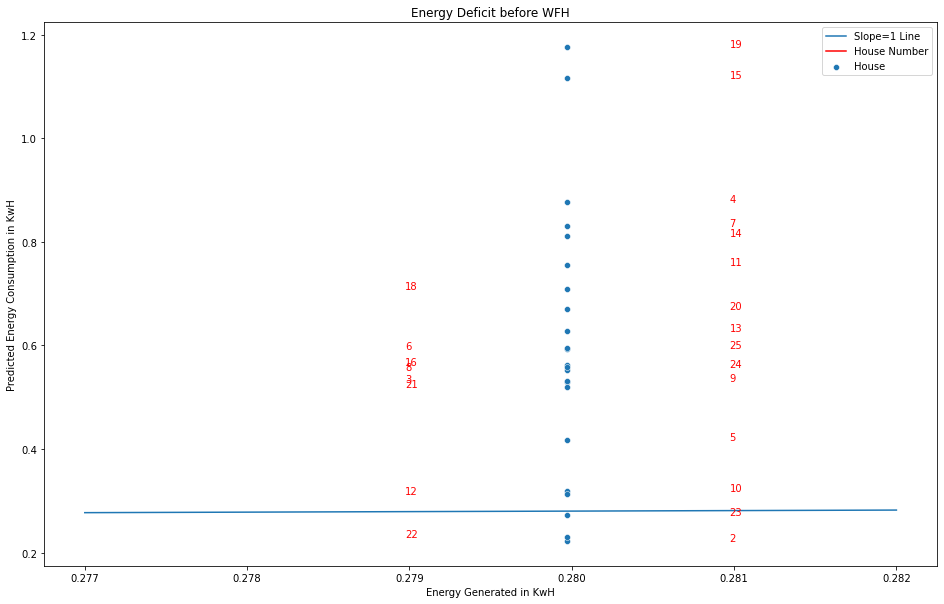

In [11]:
plot_deficit(scen_4_consum, [22,12,16,3,6,21,18,8], title = "Energy Deficit before WFH")

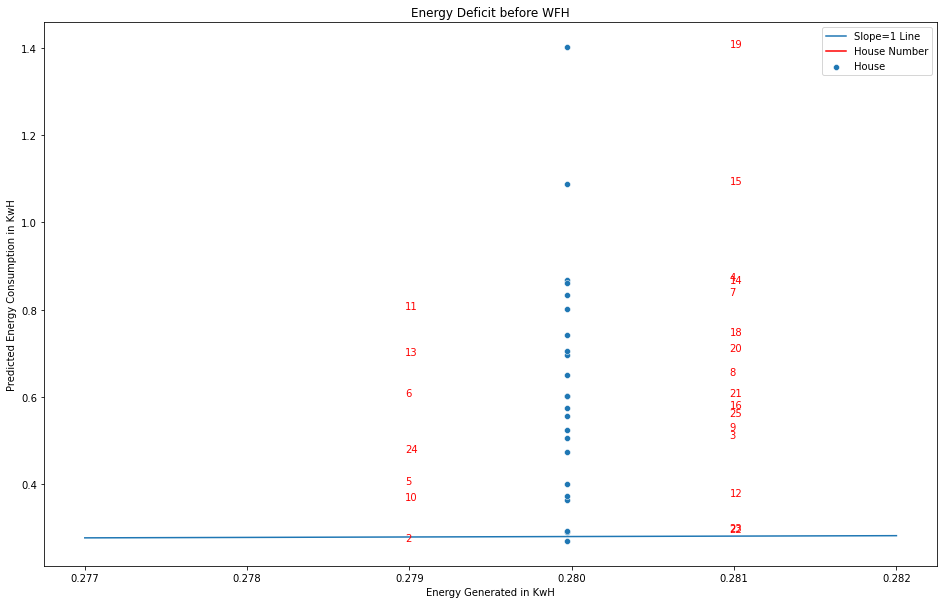

In [12]:
plot_deficit(scen_2_consum,[11,13,2,24,6,10,5], title = "Energy Deficit before WFH")

In [13]:
# Multiply with multiplier
scen_2_consum['energy_predicted'] = scen_2_consum['energy_predicted'] * 1.17
scen_4_consum['energy_predicted'] = scen_4_consum['energy_predicted'] * 1.17
scen_4_consum

,index,energy_predicted,Total Generated Energy,Predicted Energy Deficit,House Number
0,12216,0.259872,0.279972,0.057859,2
1,23887,0.619846,0.279972,-0.249810,3
2,24032,1.026596,0.279972,-0.597460,4
3,24019,0.487258,0.279972,-0.136487,5
4,24073,0.693384,0.279972,-0.312664,6
5,21210,0.972738,0.279972,-0.551427,7
6,23425,0.646947,0.279972,-0.272974,8
7,21867,0.620709,0.279972,-0.250548,9
8,23503,0.372965,0.279972,-0.038801,10
9,23360,0.883598,0.279972,-0.475240,11


In [14]:
# scen_4_consum =scenario_2_consumption_df[(scenario_4_consumption_df['timestamp'] == '2020-01-01 00:00:00')][['energy_predicted','Total Generated Energy', 'Predicted Energy Deficit', 'House Number']].reset_index()
# print("Energy Deficit without Network Devices in 2020")
# scen_2_consum =scenario_2_consumption_df[(scenario_2_consumption_df['timestamp'] == '2020-01-01 00:00:00')][['energy_predicted','Total Generated Energy', 'Predicted Energy Deficit', 'House Number']].reset_index()
# print("Energy Deficit with Network Devices in 2020")

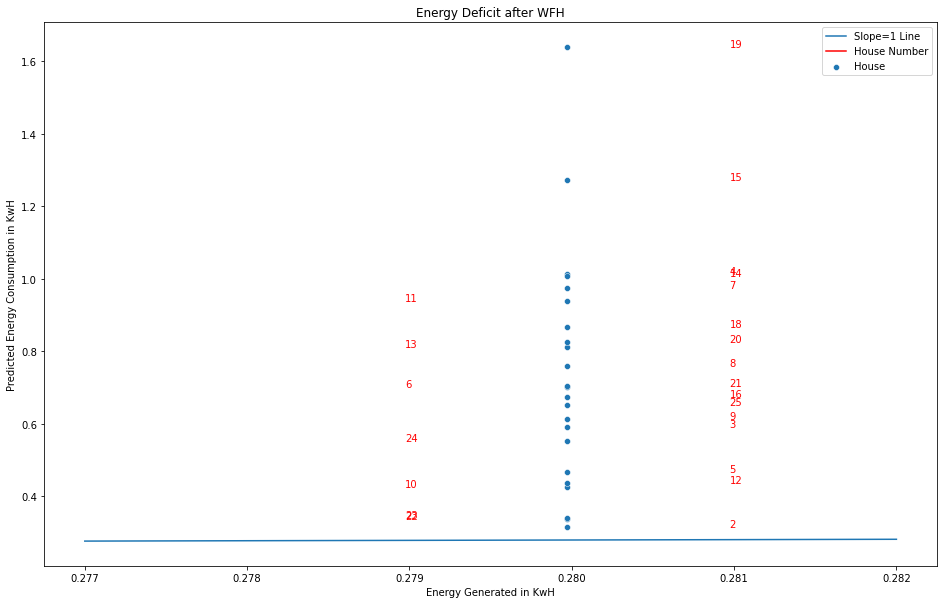

In [15]:
plot_deficit(scen_2_consum,[11,23,13,22,24,10,6], title = "Energy Deficit after WFH")

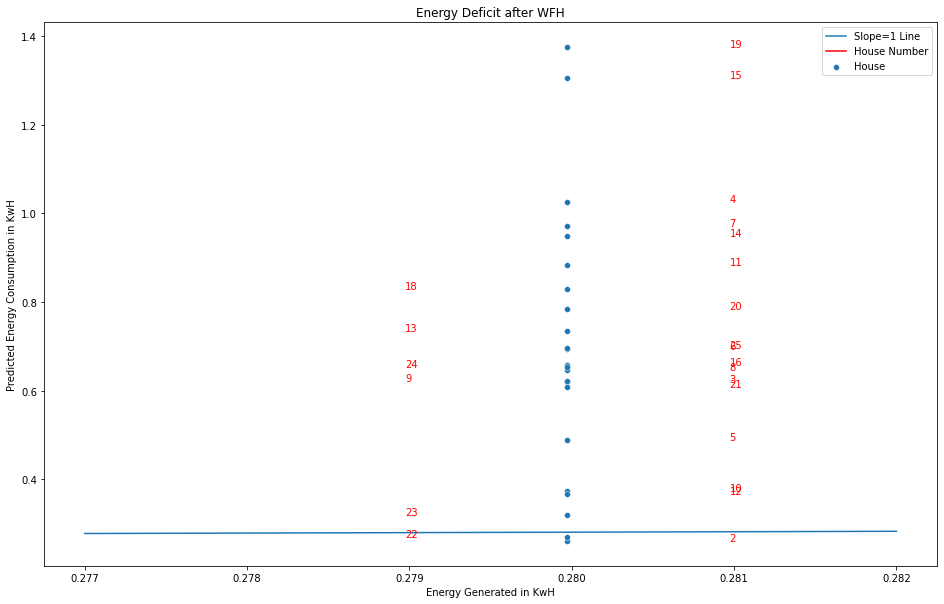

In [16]:
plot_deficit(scen_4_consum,[13,28,23,22,18,9,24], title = "Energy Deficit after WFH")

#### 

In [17]:
# House 4: Cluster 0
scenario1_cluster0 = scenario1_cluster0_results[4][['timestamp','energy_kWh', 'energy_predicted']].rename(columns={'energy_kWh': 'Real Energy Consumption Values', 'energy_predicted': 'Scenario 1'})
scenario3_cluster0 = scenario3_cluster0_results[4][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 3'})
scenario4_cluster0 = scenario_4_all_cluster_results[4][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 4'})
scenario2_cluster0 = all_cluster_results[4][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 2'})
house4 = pd.concat([scenario1_cluster0, scenario2_cluster0, scenario3_cluster0, scenario4_cluster0], axis=1)
house4['timestamp'] = house4['timestamp'] + pd.offsets.DateOffset(years=3)
house4

,timestamp,Real Energy Consumption Values,Scenario 1,Scenario 2,Scenario 3,Scenario 4
0,2018-01-30 14:00:00,0.68,0.774139,0.814397,0.539961,0.724590
1,2018-01-30 15:00:00,0.74,1.136892,0.788404,0.596522,0.682873
2,2018-01-30 16:00:00,1.21,0.985172,0.864761,0.702107,0.641993
3,2018-01-30 17:00:00,3.23,1.590117,1.388961,1.590304,1.402076
4,2018-01-30 18:00:00,2.41,2.630476,2.509973,2.354285,2.524639
...,...,...,...,...,...,...
26161,2021-01-29 19:00:00,2.20,2.088881,2.324742,2.410963,2.467966
26162,2021-01-29 20:00:00,2.28,1.851898,1.964203,1.999510,2.305627
26163,2021-01-29 21:00:00,2.04,1.907082,1.972509,2.078485,2.265290
26164,2021-01-29 22:00:00,1.66,1.732271,1.824326,1.874790,2.011586


Text(0, 0.5, 'KWh')

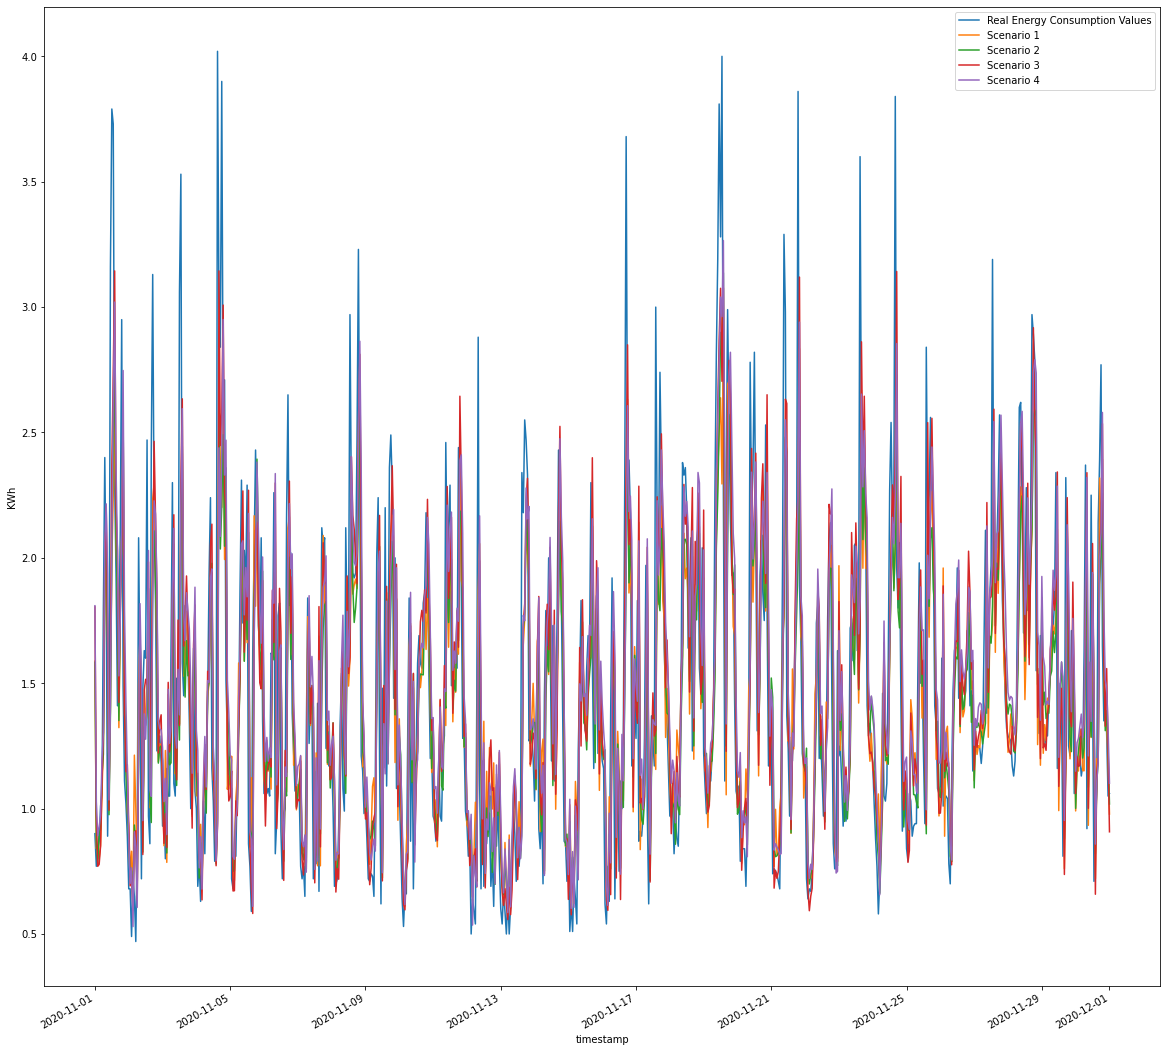

In [18]:
house4_2017 = house4[(house4['timestamp'] <= '2021-01-01') & (house4['timestamp'] >= '2020-01-01')].set_index('timestamp')
house4_nov2017 = house4[(house4['timestamp'] <= '2020-12-01') & (house4['timestamp'] >= '2020-11-01')].set_index('timestamp')
ax = house4_nov2017.plot(figsize=(20,20))
ax.set_ylabel("KWh")

In [19]:
# House 2: Cluster 2
scenario1_cluster2 = scenario1_cluster2_results[2][['timestamp','energy_kWh', 'energy_predicted']].rename(columns={'energy_kWh': 'Real Energy Consumption Values', 'energy_predicted': 'Scenario 1'})
scenario3_cluster2 = scenario3_cluster2_results[2][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 3'})
scenario4_cluster2 = scenario_4_all_cluster_results[2][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 4'})
scenario2_cluster2 = all_cluster_results[2][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 2'})
house2 = pd.concat([scenario1_cluster2, scenario2_cluster2, scenario3_cluster2, scenario4_cluster2], axis=1)
house2['timestamp'] = house2['timestamp'] + pd.offsets.DateOffset(years=2)
house2

,timestamp,Real Energy Consumption Values,Scenario 1,Scenario 2,Scenario 3,Scenario 4
0,2018-06-09 14:00:00,0.37,0.281965,0.340444,0.289500,0.284404
1,2018-06-09 15:00:00,0.52,0.420132,0.491598,0.423341,0.440512
2,2018-06-09 16:00:00,0.54,0.540199,0.601321,0.565030,0.463767
3,2018-06-09 17:00:00,0.42,0.548174,0.603382,0.585534,0.501049
4,2018-06-09 18:00:00,0.15,0.443059,0.461085,0.495962,0.476414
...,...,...,...,...,...,...
30049,2021-11-20 19:00:00,0.51,0.428766,0.513780,0.515205,0.540519
30050,2021-11-20 20:00:00,1.03,0.525029,0.602598,0.599490,0.520862
30051,2021-11-20 21:00:00,2.10,0.955844,1.132143,1.030721,1.064607
30052,2021-11-20 22:00:00,0.63,1.251688,1.406808,1.262618,1.394323


Text(0, 0.5, 'KWh')

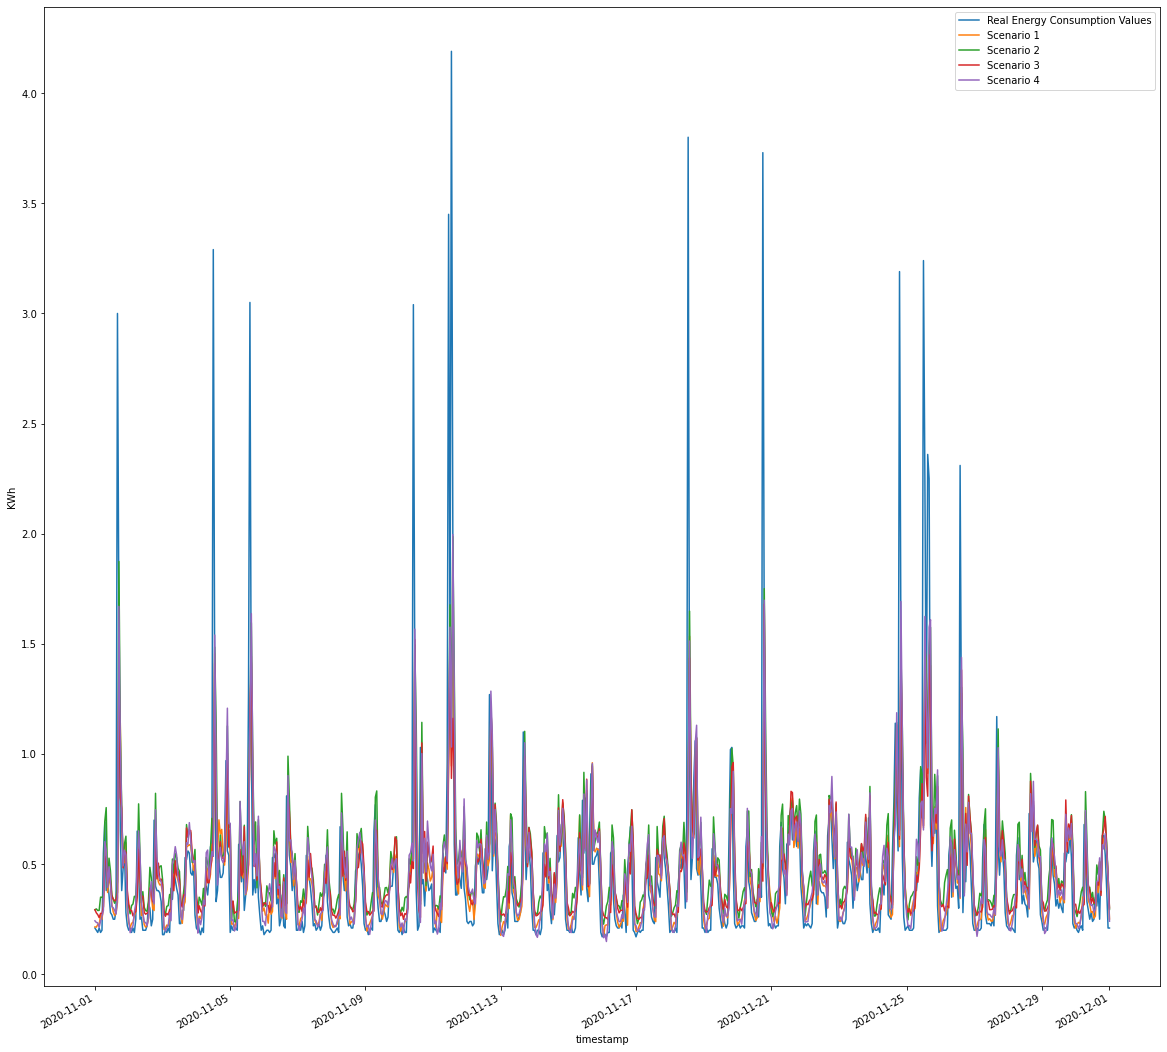

In [20]:
house2_2017 = house2[(house2['timestamp'] <= '2021-01-01') & (house2['timestamp'] >= '2020-01-01')].set_index('timestamp')
house2_nov2017 = house2[(house2['timestamp'] <= '2020-12-01') & (house2['timestamp'] >= '2020-11-01')].set_index('timestamp')
ax = house2_nov2017.plot(figsize=(20,20))
ax.set_ylabel("KWh")

In [21]:
# House 3: Cluster 3
scenario1_cluster3 = scenario1_cluster3_results[3][['timestamp','energy_kWh', 'energy_predicted']].rename(columns={'energy_kWh': 'Real Energy Consumption Values', 'energy_predicted': 'Scenario 1'})
scenario3_cluster3 = scenario3_cluster3_results[3][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 3'})
scenario4_cluster3 = scenario_4_all_cluster_results[3][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 4'})
scenario2_cluster3 = all_cluster_results[3][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 2'})
house3 = pd.concat([scenario1_cluster3, scenario2_cluster3, scenario3_cluster3, scenario4_cluster3], axis=1)
house3['timestamp'] = house3['timestamp'] + pd.offsets.DateOffset(years=3)
house3

,timestamp,Real Energy Consumption Values,Scenario 1,Scenario 2,Scenario 3,Scenario 4
0,2018-01-27 14:00:00,0.54,0.757480,0.839619,0.598661,0.773604
1,2018-01-27 15:00:00,0.68,0.600979,0.637242,0.547841,0.591122
2,2018-01-27 16:00:00,0.93,1.615515,0.819782,1.529074,0.825224
3,2018-01-27 17:00:00,2.62,2.438617,1.066494,2.391961,1.104439
4,2018-01-27 18:00:00,0.98,1.283416,1.971284,1.426819,1.945182
...,...,...,...,...,...,...
26017,2021-01-29 19:00:00,1.35,1.148203,1.143266,1.406716,1.242594
26018,2021-01-29 20:00:00,0.97,1.220213,1.302376,1.284320,1.354907
26019,2021-01-29 21:00:00,0.70,0.770410,0.938783,0.907702,0.952506
26020,2021-01-29 22:00:00,0.52,0.546205,0.744038,0.566351,0.716504


Text(0, 0.5, 'KWh')

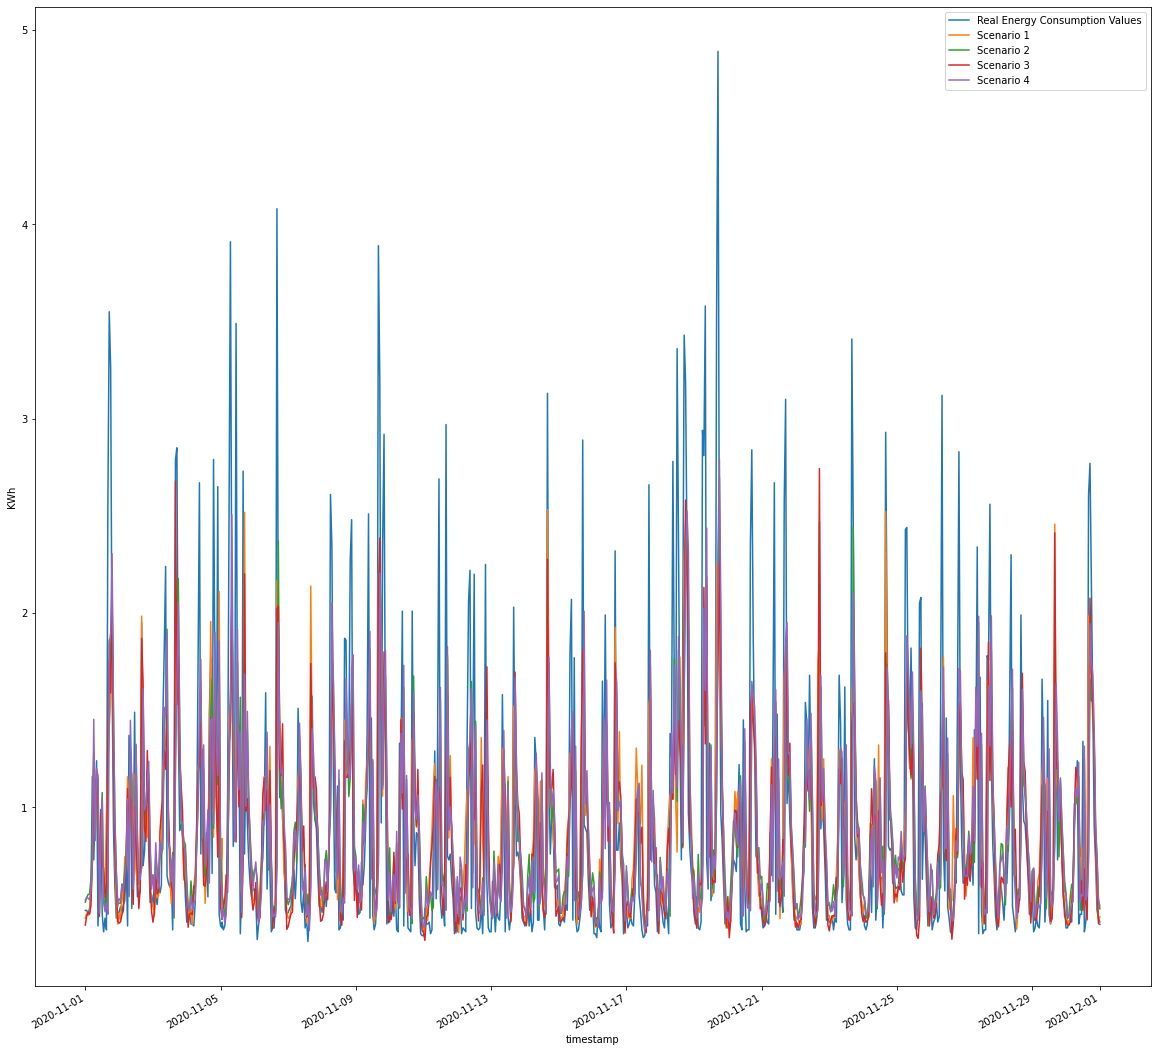

In [22]:
house3_2017 = house3[(house3['timestamp'] <= '2021-01-01') & (house3['timestamp'] >= '2020-01-01')].set_index('timestamp')
house3_nov2017 = house3[(house3['timestamp'] <= '2020-12-01') & (house3['timestamp'] >= '2020-11-01')].set_index('timestamp')
ax = house3_nov2017.plot(figsize=(20,20))
ax.set_ylabel("KWh")

In [23]:
# House 15: Cluster 1
scenario1_cluster1 = scenario1_cluster1_results[15][['timestamp','energy_kWh', 'energy_predicted']].rename(columns={'energy_kWh': 'Real Energy Consumption Values', 'energy_predicted': 'Scenario 1'})
scenario3_cluster1 = scenario3_cluster1_results[15][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 3'})
scenario4_cluster1 = scenario_4_all_cluster_results[15][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 4'})
scenario2_cluster1 = all_cluster_results[15][[ 'energy_predicted']].rename(columns={'energy_predicted': 'Scenario 2'})
house15 = pd.concat([scenario1_cluster1, scenario2_cluster1, scenario3_cluster1, scenario4_cluster1], axis=1)
house15['timestamp'] = house15['timestamp'] + pd.offsets.DateOffset(years=3)
house15

,timestamp,Real Energy Consumption Values,Scenario 1,Scenario 2,Scenario 3,Scenario 4
0,2018-09-29 14:00:00,0.89,1.208078,1.146667,1.355404,1.142396
1,2018-09-29 15:00:00,1.15,1.450127,1.217931,1.189534,1.224662
2,2018-09-29 16:00:00,0.98,1.211071,1.608708,1.151608,1.615495
3,2018-09-29 17:00:00,0.86,0.960331,1.252259,1.000691,1.122217
4,2018-09-29 18:00:00,0.87,0.972474,0.968551,0.945096,0.904980
...,...,...,...,...,...,...
20902,2021-02-20 19:00:00,2.88,2.433720,1.737668,2.202170,2.089519
20903,2021-02-20 20:00:00,2.78,2.605672,2.435277,2.665632,2.600254
20904,2021-02-20 21:00:00,4.49,2.963682,2.562888,2.730179,2.671185
20905,2021-02-20 22:00:00,3.82,3.775242,3.402077,3.374327,3.268274


Text(0, 0.5, 'KWh')

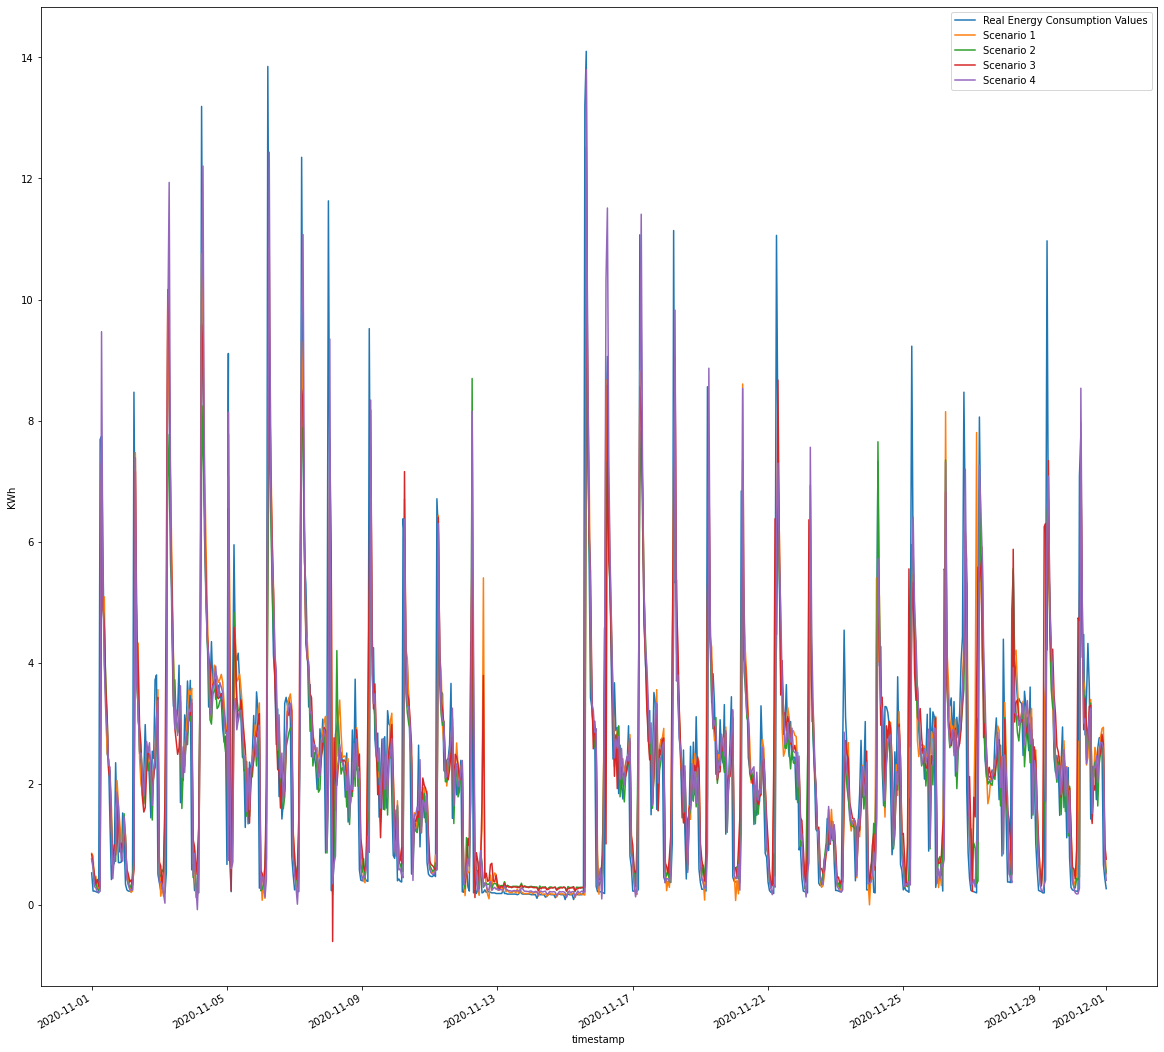

In [24]:
house15_2017 = house15[(house15['timestamp'] <= '2021-01-01') & (house15['timestamp'] >= '2020-01-01')].set_index('timestamp')
house15_nov2017 = house15[(house15['timestamp'] <= '2020-12-01') & (house15['timestamp'] >= '2020-11-01')].set_index('timestamp')
ax = house15_nov2017.plot(figsize=(20,20))
ax.set_ylabel("KWh")